In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [55]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset 확인

In [56]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 각 feature에 대한  통계치 

In [58]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 null data check

In [60]:
for col in df_train.columns:
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:   Survived 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 19.87%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.00%
column:      Cabin 	 Percent of NaN value: 77.10%
column:   Embarked 	 Percent of NaN value: 0.22%


In [61]:
for col in df_test.columns:
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 20.57%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.24%
column:      Cabin 	 Percent of NaN value: 78.23%
column:   Embarked 	 Percent of NaN value: 0.00%


- Train, Test Set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Ebarked(Train만 0.22%) null data가 존재함
- 아래는 MANO 라이브러리를 사용하여 null data를 확인한 결과 이다.

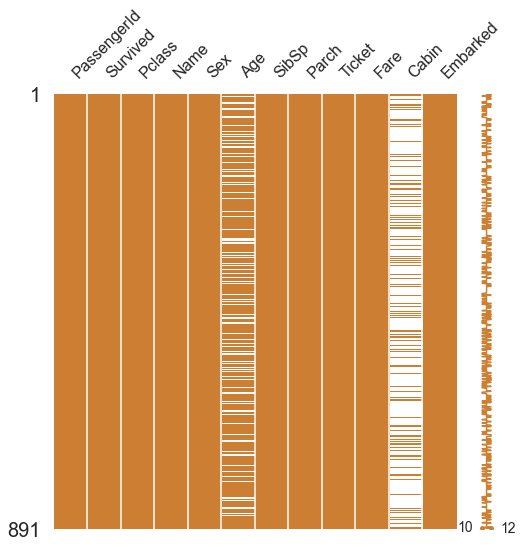

In [62]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

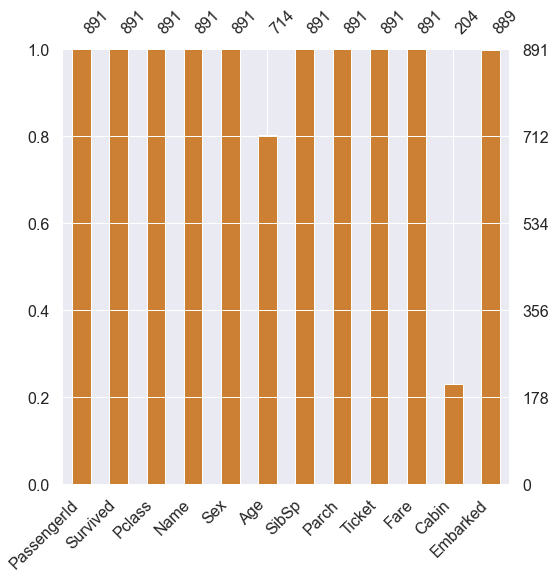

In [63]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

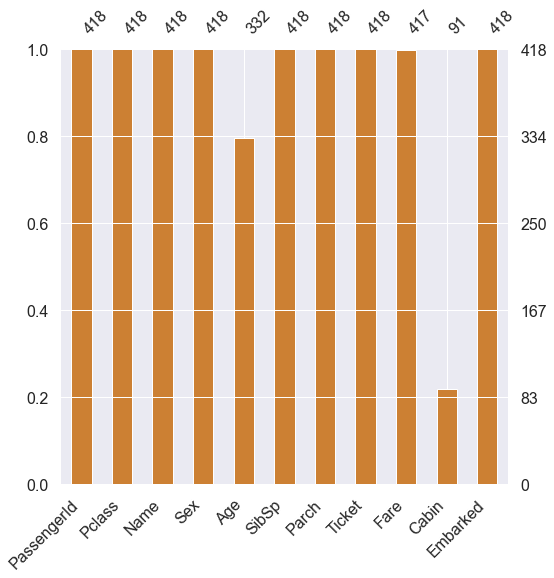

In [64]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인
- target label 이 어떤 distribution을 가지고 있는지 확인이 필요함.
- binary classification 문제의 1과 0의 분포에 따라 모델의 평가 방법이 달라 질 수 있음.

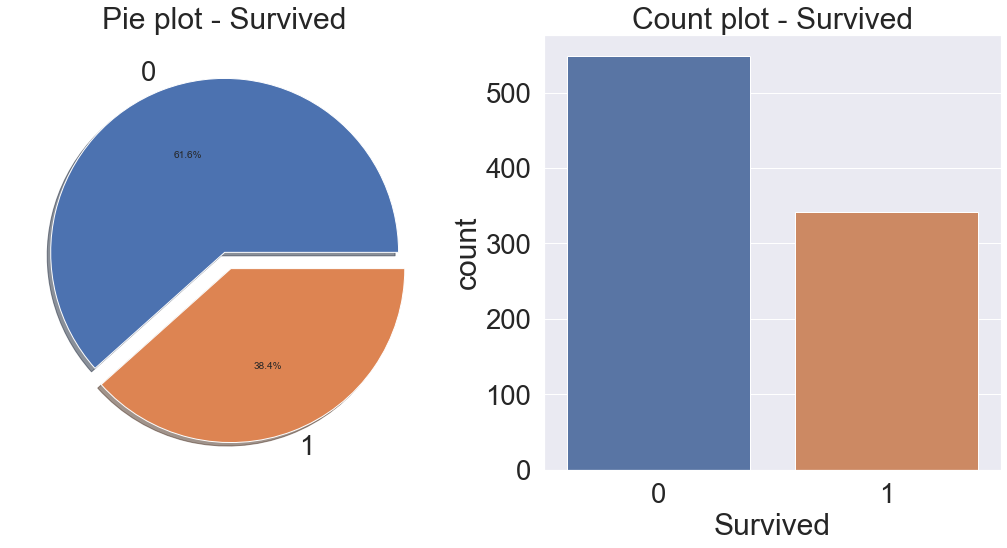

In [65]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 사망률이 더 크다
- 생존률은 38.4% 이다
- target label의 분포가 제법 균일(balanced)하다.
- 만약 불균일할 경우, 예를 들어 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%이기 때문에 다시 고려해봐야한다.

# 2. EDA (Exploratory data analysis)
- 데이터 시각화를 통해 데이터 분석
- 시각화 라이브러리 : matplotlib, seaborn, plotly

## 2.1 Pclass
- Pclass : ordinal, 서수형 데이터, 카테고리이면서 순서가 있음.
- Pclass에 따른 생존률 확인
- pandas dataframe에서 groupby를 사용하거나 pivot이라는 메소드 활용
- 방법:'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 각 pclass 마다 0,1 이 count가 되는데 이를 평균을 내면 각 pclass별 생존률을 구할 수 있다.    

In [66]:
# 각 class 별 사람 수 확인
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [67]:
# 각 class 별 생존한 사람 수 확인
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [68]:
# pandas의 crosstab을 사용하여 확인
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


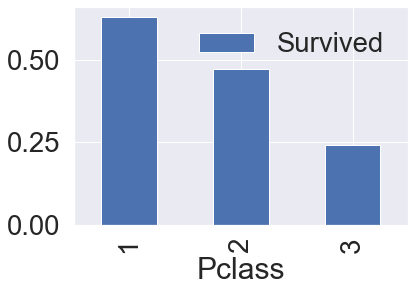

In [69]:
# grouped 객체에 mean을 하게 되면 각 클래스별 생존률을 얻을 수 있음.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

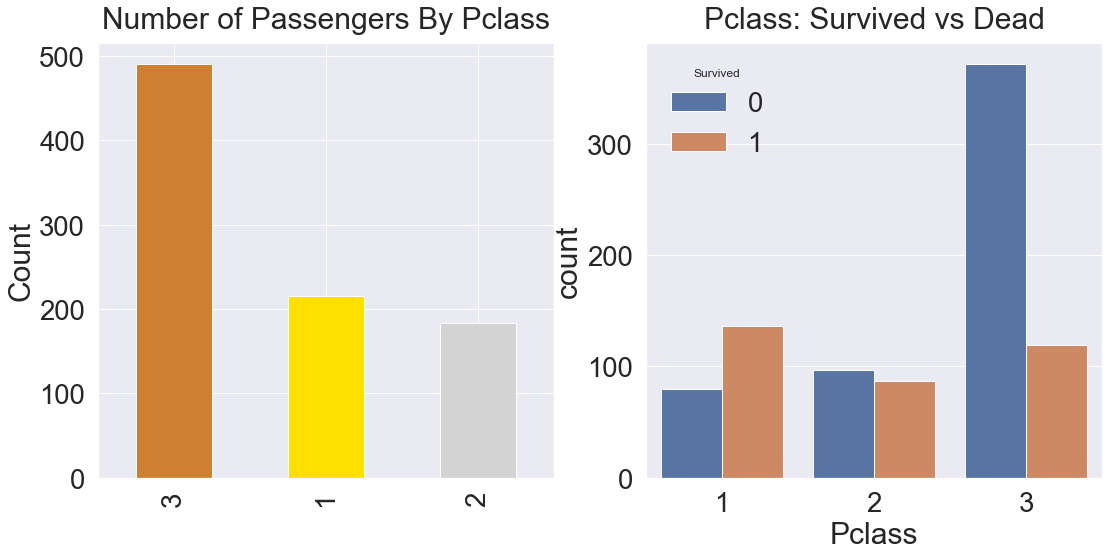

In [70]:
# seaborn의 countplot을 이용하여 특정 label에 따른 개수 확인 

y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있다. 
- Pclass 1,2,3 순서대로 63%, 48%, 25% 생존률이다이다.
- 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것을 고려해본다.

## 2.2 SEX
- 성별로 생존률이 어떻게 달라지는지 확인한다.
- pandas groupby, seaborn countplot을 사용하여 시각화 한다.

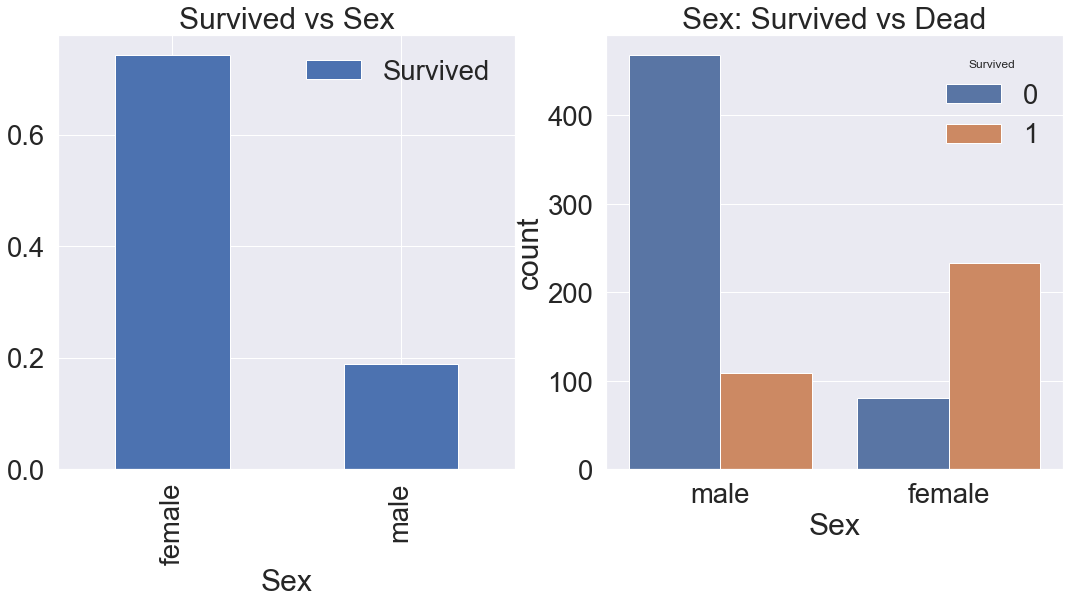

In [71]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 여자가 생존할 확률이 높다.

In [72]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [73]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Sex 변수는 Pclass와 마찬가지로 예측모델에 중요한 feature이다. 

## 2.3 Both Sex and Pclass
- Sex, Pclass 두가지 feature에 따라 생존률의 분포를 확인한다.
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

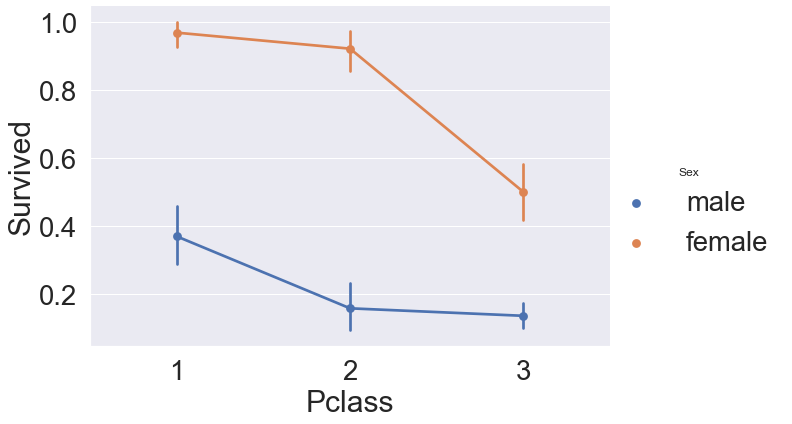

In [74]:
# 혹시 TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe' . 에러가 발생한다면, seaborn 라이브러리를 삭제후 다시 설치해주면 정상적으로 해결 된다. 
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있음
- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.
- 위 그래프는 hue 대신 column으로 하면 아래와 같다.

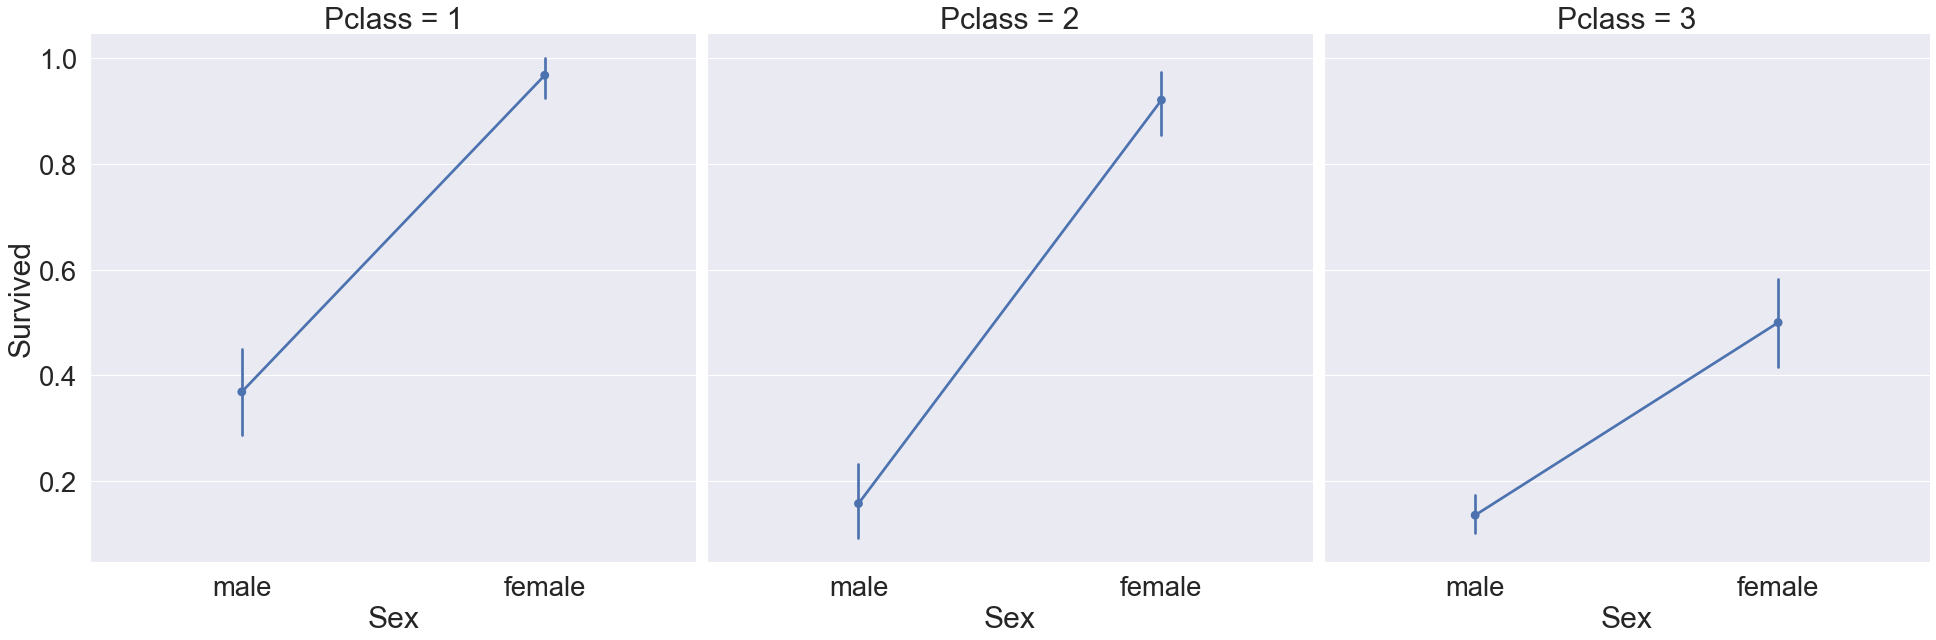

In [75]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train,  size=9, aspect=1)

## 2.4 Age

In [76]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


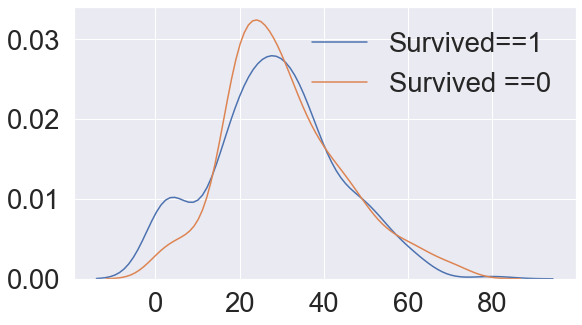

In [77]:
# 생존에 따른 histogram

fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived ==0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많다.

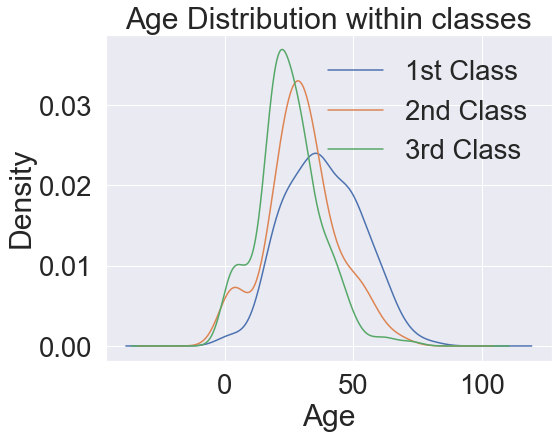

In [78]:
# Age distribution withing classes 
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class','3rd Class' ])

- Class가 높을 수록 나이 많은 사람의 비중이 커짐.
- 나이대가 변하면서 생존률이 어떻게 되는지 아래에서 확인한다.

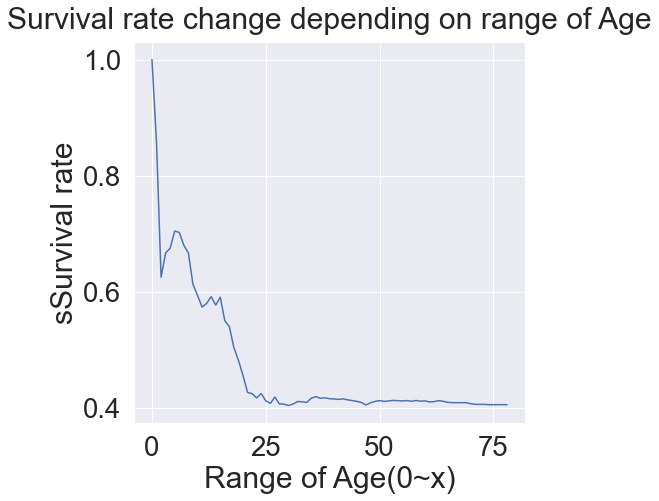

In [79]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y =1.02)
plt.ylabel('sSurvival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 높은 것을 확인할 수 있다. 
- 나이 변수도 중요한 feature로 쓰일 수 있다. 

## 2.5 Pclass, Sex, Age
- 지금까지 본 Pclass, Sex, Age, Survived에 대해서 한번에 분포를 확인한다.
- seaborn의 violinplot을 확인한다.
    - x 축 : 보고 싶은 케이스 (Pclass, Sex)
    - y 축 : 보고 싶은 distribution(Age)

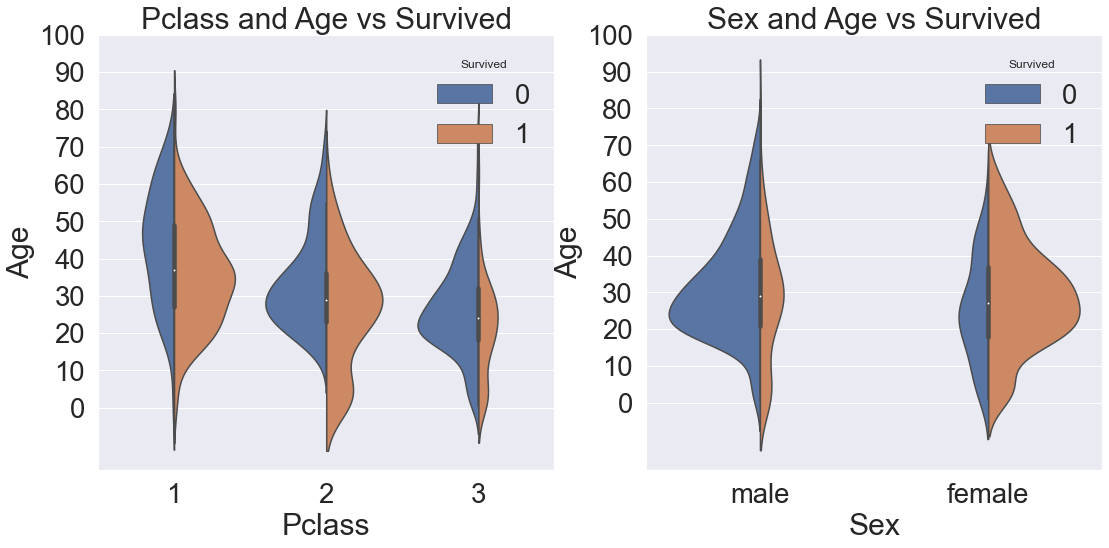

In [80]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0]) # 클래스별 나이분포의 생존률 
ax[0].set_title('Pclass and Age vs Survived') # 제목 
ax[0].set_yticks(range(0, 110, 10)) # 점선 긋기
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 생존률은 모든 클래스에서 나이가 어릴 수록 높다.
- 생존률은 성별 중 여자가 더 높다. 
- 결론적으로 여성과 아이를 먼저 챙긴 것으로 추측된다.


## 2.6 Embarked
- Embarked : 탑승한 항구

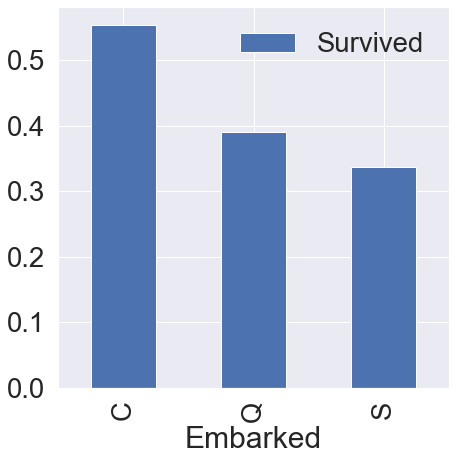

In [81]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 각 항구별 생존율을 구하면, C가 제일 높다. 

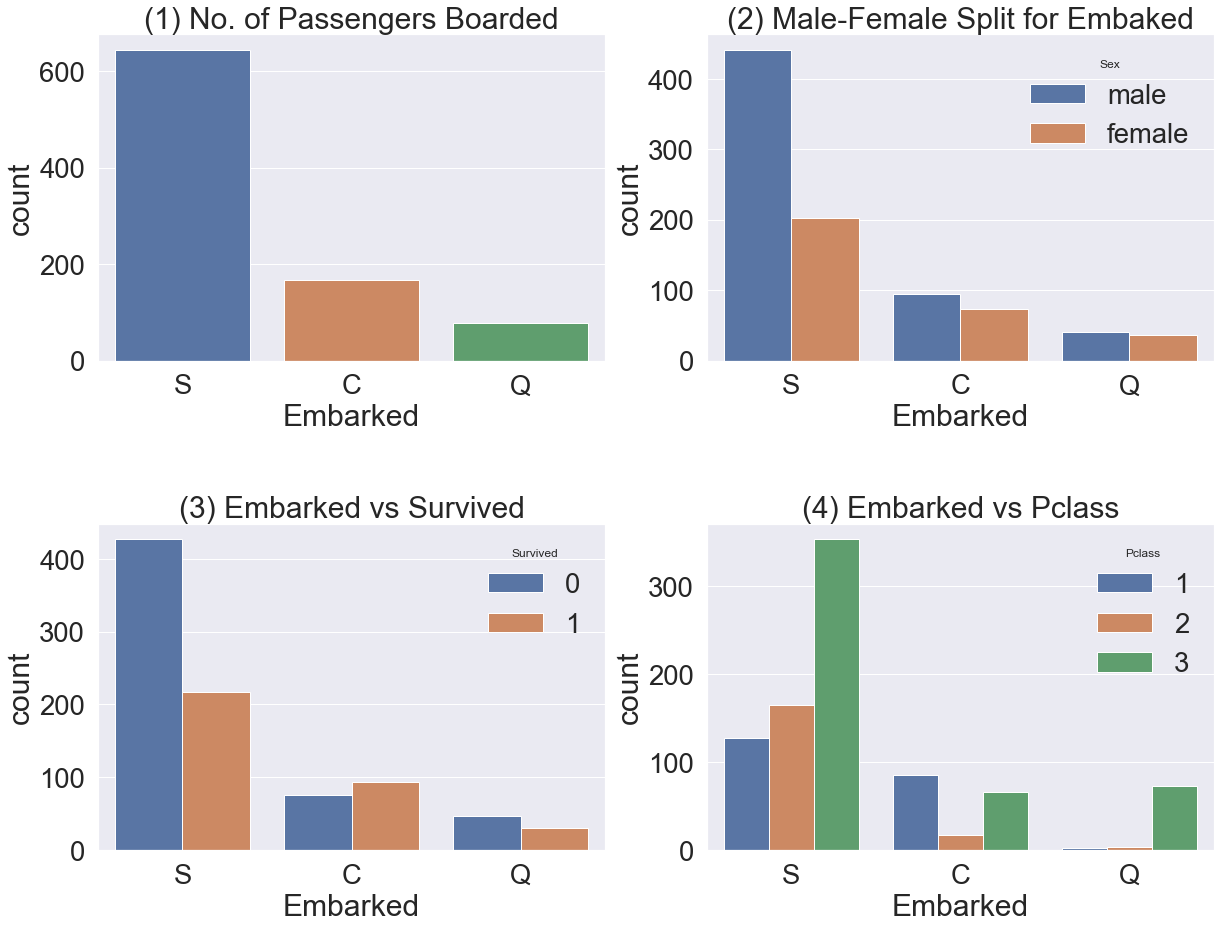

In [82]:
f ,ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex' , data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embaked')
sns.countplot('Embarked', hue='Survived' , data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass' , data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


- Figure(1) : 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승함.
- Figure(2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) : 생존확률이 S가 가장 낮다.
- Figure(1) : C가 생존확률이 높은것은 클래스가 높은 사람이 많이 타서 이고, S는 3rd class가 많아서 생존확률이 낮게 나옴.

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp(형제 자매)와 Parch(부모, 자녀)를 합쳐서 분석

In [83]:
# 자신을 포함하기 위해 1을 더한다.
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1 

In [84]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


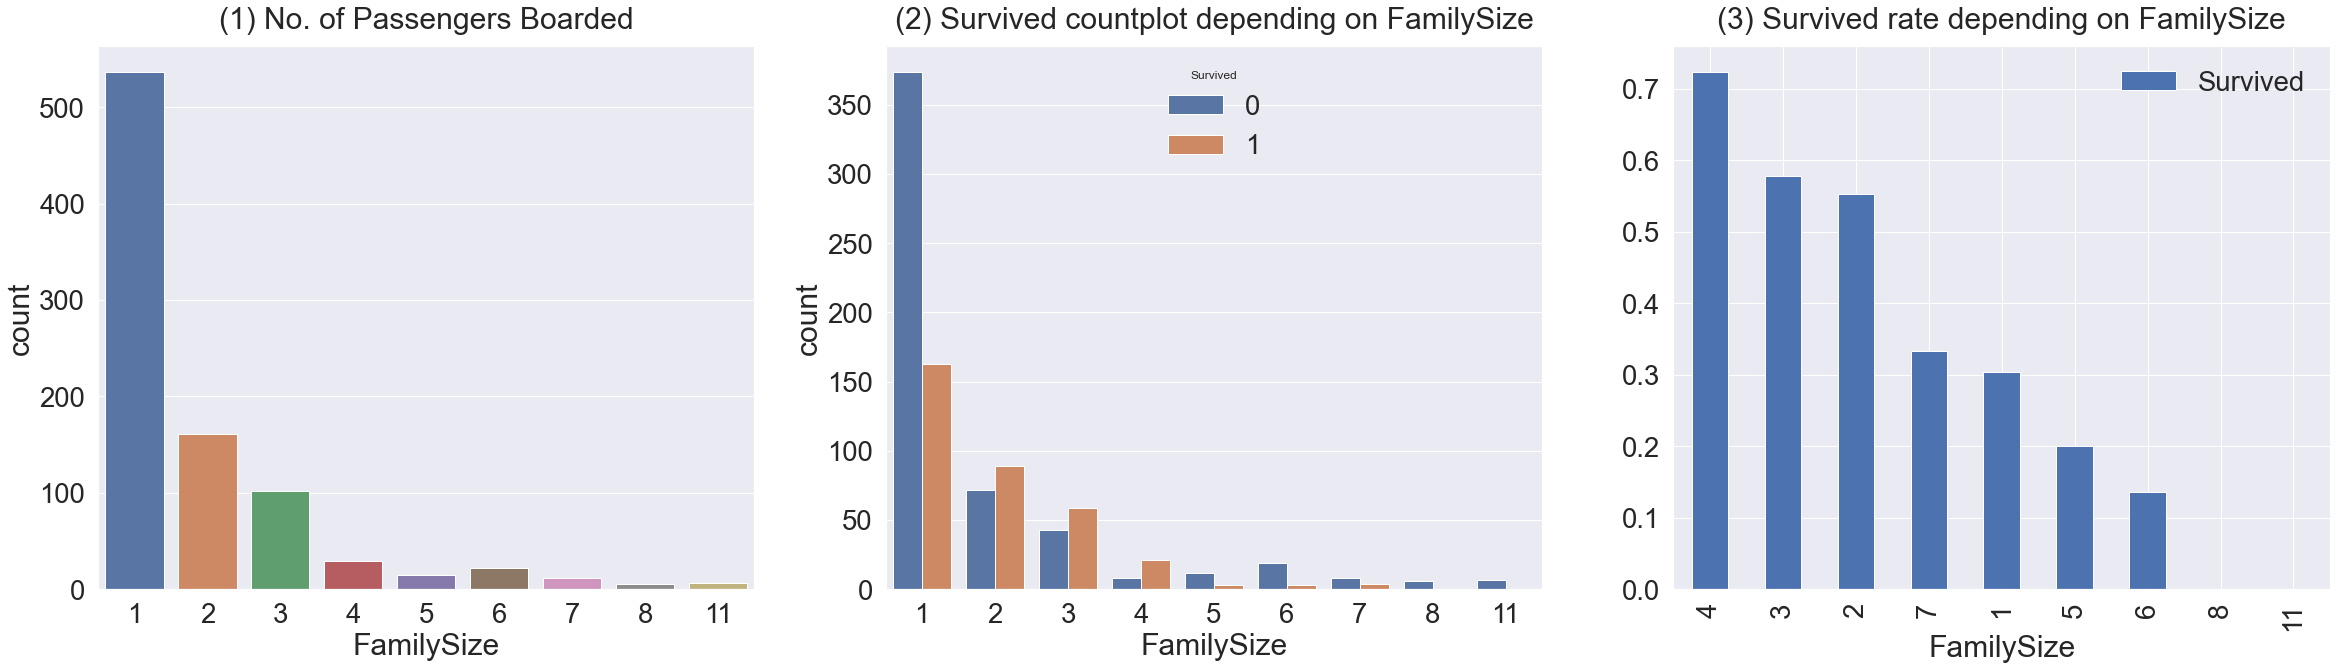

In [85]:
#FamilySize와 생존 관계

f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) : 가족의 크기가 1~11까지 있으며, 대부분 1 이고, 그다음으로 2,3,4가 많다.
- Figure(2), (3) : 가족의 크기에 따른 생존 비교는 가족이 4명인 경우 가장 생존률이 높다. 하지만 가족수가 많아질 수록 생존률이 낮아 진다. 
- 결론 : 3~4명 선에서 생존률이 가장 높은것을 확인할 수 있다. 

## 2.8 Fare
- Fare : 탑승요금, 연속형 변수이다. 

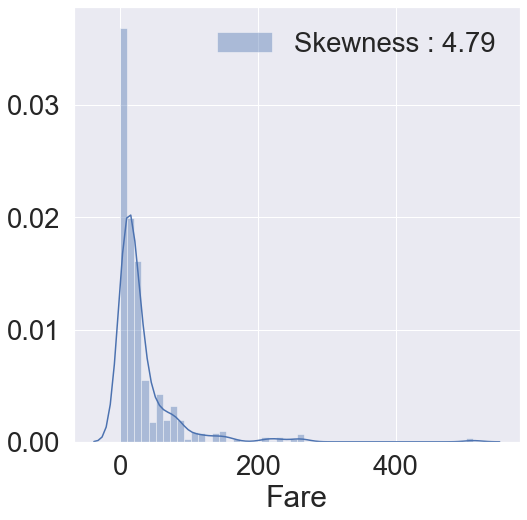

In [86]:
# histogram 확인, sknewness: 비대칭도
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g = g.legend(loc='best')

- distribution이 비대칭이다.(= high skewness)
- 이런 형태로 모델에 적용하면 outlier의 영향으로 좋지 않은 결과가 나온다.
- outlier의 영향을 줄이기 위해 Fare에 log를 취함
    - pandas의 map, apply 활용 하거나 lambda 함수 사용 

In [87]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set에 있는 none value를 평균값으로 치환

df_train['Fare']= df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare']= df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

In [88]:
df_test['Fare']

0      2.057860
1      1.945910
2      2.270836
3      2.159003
4      2.508582
         ...   
413    2.085672
414    4.690430
415    1.981001
416    2.085672
417    3.107198
Name: Fare, Length: 418, dtype: float64

In [89]:
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

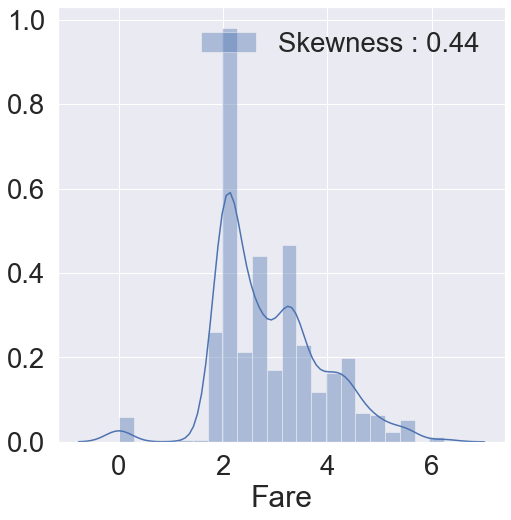

In [93]:
fig, ax = plt.subplots(1 ,1 , figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라졌다. 
- 이 작업은 feature engineering에 해당한다. 

## 2.9 Cabin
- 이 변수는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
- 그러므로 모델에 포함시키지 않도록 한다. 

In [94]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket
- 이 변수는 NaN은 없다. String data이므로 추가 작업이 필요하다. 

In [95]:
df_train['Ticket'].value_counts()

347082        7
CA. 2343      7
1601          7
CA 2144       6
3101295       6
             ..
348121        1
312992        1
113028        1
237565        1
C.A. 31026    1
Name: Ticket, Length: 681, dtype: int64